# Welcome .............
It shouldn't come as a surprise that YouTube, one of the most widely used video hosting services, has nearly 5 billion daily video views and 1,300,000,000 active users. <br/>
![](https://images.unsplash.com/photo-1543185377-99cd16011803?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80)
<br>
YouTube is one of the biggest websites around – to be more specific, it’s currently the second most popular website in the world. And even though most people don’t think of YouTube primarily as a search engine, that’s exactly what most visitors do on the site. YouTube’s not just the second most popular website; it’s also the second most popular search engine – topped only by Google. This means that the platform presents a huge potential for reach for your business.


# >>>><p style="font-family:'Courier New'">This kernel deals with complete EDA on:<p style="font-family:verdana">Trending YouTube Video Statistics dataset</p></p><<<<
## To do list -->

* Data Reading and cleaning
* Get feel, Visualize missing values and cataloguing time format of given data
* Video Content Distribution
* People's Response factors on trended Videos
* Deep analysis on responses of different Content category of trended videos
* Visualize video status/errors (i.e comment,likes disabled,video_error_or_removed)
* Time series analysis
* Correlation between factors to Trend a Video
* Text analysis via wordcloud 
* Finding most Appreciated/Trended video channels among different category/Titles
   
<br>

-

>  Give me your feedback and if you like my kernel **votes up**

New suggestions or any statistical idea is appreciated.
## Let's jump to Code Directly.
------->>>--------->>>-------->>>-------->>>

In [ ]:
import numpy as np                              # linear algebra
import pandas as pd                             # data processing, CSV file I/O (e.g. pd.read_csv)

import missingno as mss                         # Missing data visualization module for Python
import matplotlib.pyplot as plt                 # Data visualization
import seaborn as sns                           #  Data visualization
sns.set_style('darkgrid')
from datetime import datetime                   # For Time formate operations
import matplotlib.cm as cm                 
from collections import Counter                 # Counter
import string                                   # strings

from wordcloud import WordCloud, STOPWORDS      # WordCloud 
from tqdm import tqdm                           # keep track to iterations



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youtube-new/FRvideos.csv
/kaggle/input/youtube-new/JPvideos.csv
/kaggle/input/youtube-new/KRvideos.csv
/kaggle/input/youtube-new/CAvideos.csv
/kaggle/input/youtube-new/USvideos.csv
/kaggle/input/youtube-new/RU_category_id.json
/kaggle/input/youtube-new/DE_category_id.json
/kaggle/input/youtube-new/US_category_id.json
/kaggle/input/youtube-new/GBvideos.csv
/kaggle/input/youtube-new/KR_category_id.json
/kaggle/input/youtube-new/IN_category_id.json
/kaggle/input/youtube-new/JP_category_id.json
/kaggle/input/youtube-new/MXvideos.csv
/kaggle/input/youtube-new/CA_category_id.json
/kaggle/input/youtube-new/GB_category_id.json
/kaggle/input/youtube-new/MX_category_id.json
/kaggle/input/youtube-new/INvideos.csv
/kaggle/input/youtube-new/RUvideos.csv
/kaggle/input/youtube-new/DEvideos.csv
/kaggle/input/youtube-new/FR_category_id.json


# Data Reading and cleaning
>  Loading .json file first

In [ ]:
df_json=pd.read_json('/kaggle/input/youtube-new/IN_category_id.json').head()
df_json.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
1,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
2,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
3,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
4,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."


In [ ]:
df_json['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

The '**items**' column have more weightage than other columns,
because it contains the dictionary having unique **id**,**title** value pairs for different Video categories. We will later combine it with the main .csv file.

Let's read the .csv file.

In [ ]:
df=pd.read_csv('/kaggle/input/youtube-new/INvideos.csv')
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


The data appears to be quite messy, especially for time formating. We have to specify video category mapping from **category_id** to our pre-loaded .json file. 

In [ ]:
def permute(x):
    y=[x.split('.')[0],x.split('.')[2],x.split('.')[1]]
    return '-'.join(y)

def convert_to_datetime(df):
    df['publish_date']=pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')        # trending date ---> yy|dd|mm
                                                                                                 # publish time  ---> yyyy|mm|dd
    df['publish_date']=df['publish_date'].apply(lambda x: str(x)[2:10])
    
    df["publishing_day"] = df["publish_time"].apply(
    lambda x: datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
    
    df.publish_time=df.publish_time.apply(lambda x: str(x)[11:-8])
    df.trending_date=df.trending_date.apply(permute)
    
    return df

In [ ]:
def load_data(country_name,fill_catagory=False,change_date=False):
    file=country_name+str('videos.csv')
    root_path='/kaggle/input/youtube-new'
    path=os.path.join(root_path,file)
    df=pd.read_csv(path)
    if fill_catagory:
        title_dict={}
        json_path=os.path.join(root_path,(country_name+str('_category_id.json')))
        json_df=pd.read_json(json_path)
        for dict_ in json_df['items']:
            title_dict[dict_['id']]=dict_['snippet']['title']
        global missing_title_cata   # to keep track of missing id ,which shoudn't map from .csv ->.json file
        missing_title_cata=0
        def apply_title(x,dictionary):
            global missing_title_cata
            try:
                return dictionary[str(x)]
            except:
                missing_title_cata+=1
                return np.nan
        df['Title']=df['category_id'].apply(apply_title,args=(title_dict,))
        
        if change_date:
            df=convert_to_datetime(df)
    
        print('{} Titles missing'.format(missing_title_cata))
    return df

In [ ]:
df=load_data('IN',fill_catagory=True,change_date=True)
df.head()

105 Titles missing


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Title,publish_date,publishing_day
0,kzwfHumJyYc,17-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,Film & Animation,17-11-12,Sun
1,zUZ1z7FwLc8,17-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",News & Politics,17-11-13,Mon
2,10L1hZ9qa58,17-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,Entertainment,17-11-12,Sun
3,N1vE8iiEg64,17-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,Comedy,17-11-12,Sun
4,kJzGH0PVQHQ,17-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,Entertainment,17-11-13,Mon


# Visualize missing values and cataloguing time format of given data

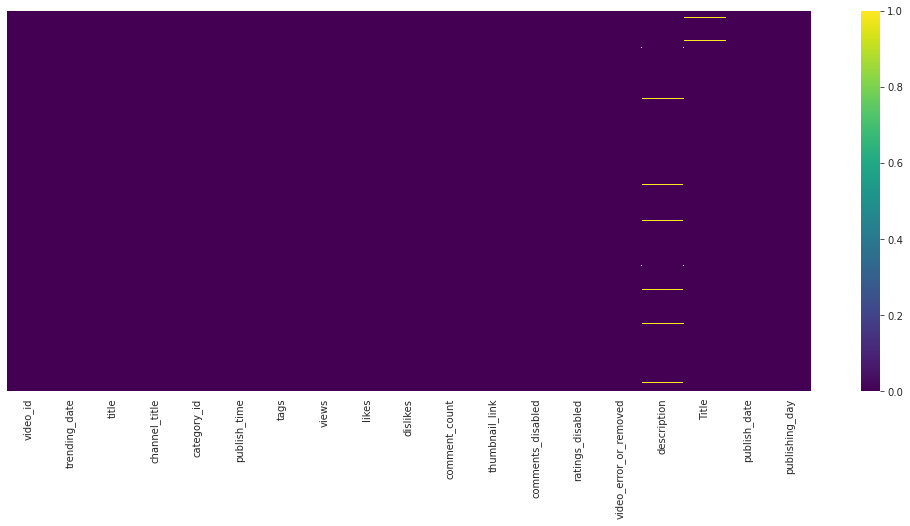

In [4]:
plt.figure(figsize=(18,7))
sns.heatmap( df.isnull() , cmap = 'viridis' , yticklabels= False , cbar = True )

In [ ]:
df.info(verbose=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                37352 non-null  object
 1   trending_date           37352 non-null  object
 2   title                   37352 non-null  object
 3   channel_title           37352 non-null  object
 4   category_id             37352 non-null  int64 
 5   publish_time            37352 non-null  object
 6   tags                    37352 non-null  object
 7   views                   37352 non-null  int64 
 8   likes                   37352 non-null  int64 
 9   dislikes                37352 non-null  int64 
 10  comment_count           37352 non-null  int64 
 11  thumbnail_link          37352 non-null  object
 12  comments_disabled       37352 non-null  bool  
 13  ratings_disabled        37352 non-null  bool  
 14  video_error_or_removed  37352 non-null  bool  
 15  de

There are 560 Videos with **no description**. In order to clean up the data and get rid of the null values, we put an empty string in place of each null value in the description column.

In [ ]:
df["description"] = df["description"].fillna(value=" ")

## Let's see data distribution w.r.t data collection YEAR

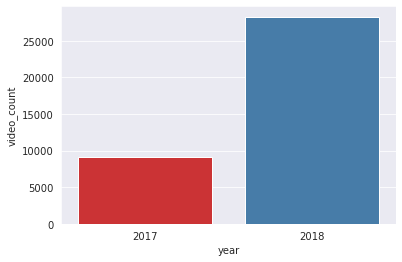

In [ ]:
def video_per_year(df,name):
    df=df.trending_date.apply(lambda x: str(20) + x[:2]).value_counts().reset_index()
    df.rename(columns={"index": "year", "trending_date": "video_count"},inplace=True)
    sns.barplot(x='year',y='video_count' ,data=df,palette="Set1")
    

video_per_year(df,'in')    

**More tha 50% of data is from year 2018  !**

# Video Content Distribution

In [ ]:
def num_title_posted(df):
    color = ["#06547a","#36796e","#3e8b7e","#6edda2", "#45a4b8", "#b6f5f6", "#2ecc71"]
    df=df.Title.value_counts()
    df=pd.DataFrame(df)
    df.reset_index(level=0,inplace=True)
    plt.figure(figsize=(25,10))
    df.columns=['Title','value_count']
    sns.barplot(y='value_count', x="Title", data=df,palette=sns.color_palette(color))

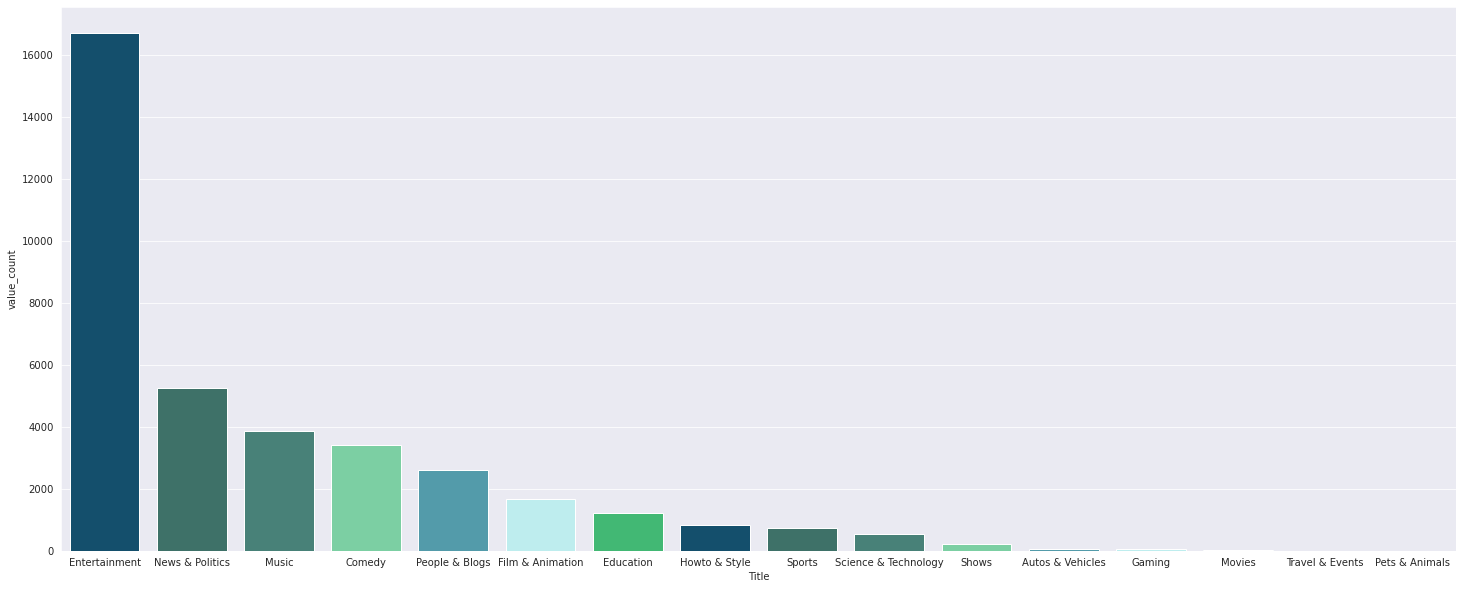

In [ ]:
num_title_posted(df)

### We can see that from *14/11/2017 - 14/06/2018*  most users give more preferance to **entertain** themselves by watching Videos on YouTube !
I think this is because:
* People are interested only when any topic is simple and shown to them pictorially or explained using interesting pictures or by simple examples. 
* People usually browse YouTube in their leisure-time.
* When viewers enjoy the video's content, typically they share it with their colleagues, friends etc. to make them feel happy, relaxed.
![](https://i.gifer.com/74H4.gif)
<br>

## -------------------------------------------------------------------------
<br>

# Users Response factors on trended Videos

In [ ]:
def Plot_hist(df,limit=None,factor='views', per_limit=None):
    if per_limit is not None:
        per=(len(df[df[factor]<per_limit][factor])/len(df[factor]) )*100
        print('{0} percent of trended videos got less than {1} {2}'.format(per,per_limit,factor))
    if limit is None:
        plt.figure(figsize=(14,7))
        sns.distplot(df[factor], kde=False, color='#976393')
        plt.ylabel('No. of videos')
    else:
        f,ax=plt.subplots(1,2 ,figsize=(20,7))
        ax[0].set( ylabel="No. of Videos")
        ax[1].set(ylabel="No. of Videos")
        sns.distplot(df[factor], kde=False, color='black', ax=ax[0])
        sns.distplot(df[df[factor] < limit][factor],kde=False, color='b', ax=ax[1])
    

86.19083315485115 percent of trended videos got less than 1500000.0 views


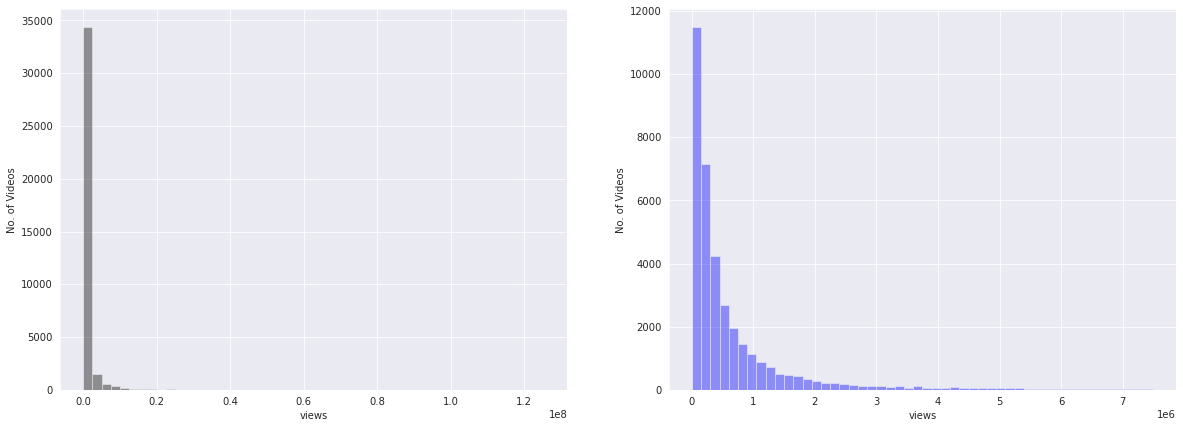

In [ ]:
Plot_hist(df,factor='views', limit=0.75e7, per_limit=1.5e6)

81.99293210537589 percent of trended videos got less than 25000 likes


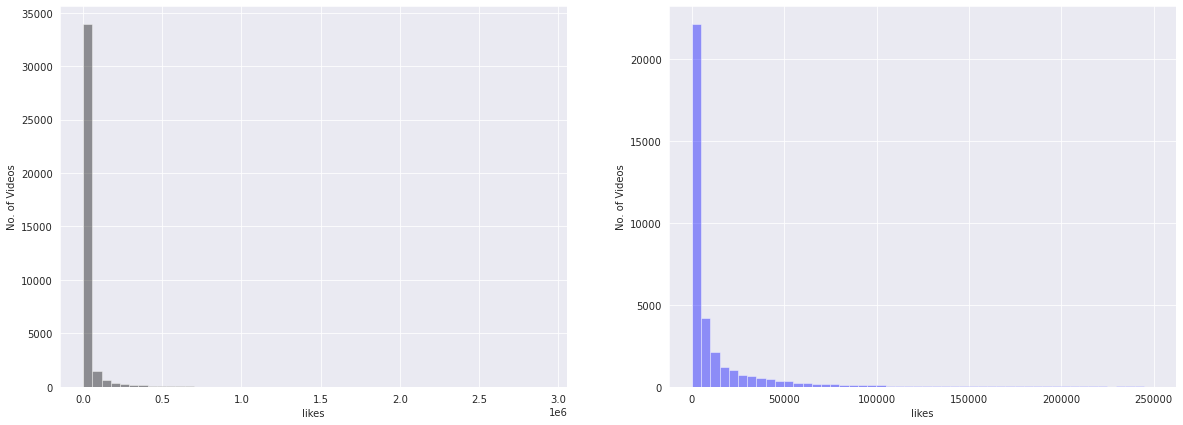

In [ ]:
Plot_hist(df, factor='likes', limit=2.5e5, per_limit=25000)

1. We can interpret that **86.2%** of trending videos have **1.5 million** views or less.
2. Also **82%** of trending videos have **25k likes** or less.
<br>
<img src="https://technostalking.com/wp-content/uploads/2019/10/image001.jpg" width="400" >
<br>

## -------------------------------------------------------------------------

<br>


# Deep analysis on response got by different Content category of Trended Videos
### Here's what I found on the web about "*Does the category of a YouTube video affect the views?*"
Currently, the number of YouTube users is huge and almost every aspect of life becomes the inspiration for Youtubers so that they create videos with diverse content. However, not all content will receive the number of views as expected, it completely depends on the tastes of the audience
There are millions of users accessing YouTube every day and their use is completely different. We can divide the purpose of Youtube users into 3 main points:
*  Entertainment (i.e entertainment, gaming, music, movies etc )
*  Study         (i.e Science and tech related videos, etc)
*  Discover      (i.e  online teaching videos, travelling, etc )

Because the purpose of each viewer is not the same, different categories receive different views.

In [ ]:
# Function for Single Factor analyses
def analyse_by_title(df,factor='views',name=None):
    print(str(factor))
    df=df.groupby(['Title'])
    df=df[factor].mean()
    df.sort_values(ascending=False,inplace=True)
    df=pd.DataFrame(df)
    df.reset_index(level=0,inplace=True)
    plt.figure(figsize=(20,10))
    if name is not None:
        plt.title('Number of {} per Trending Video of each Title category in {}'.format(factor,name))
    else:
        plt.title('Number of {} per Trending Video of each Title category'.format(factor))
    sns.barplot(x=factor, y="Title", data=df)
    

In [ ]:
# Function for MULTI Factor analyses
def analyse_by_mulfactor(df,factors,name=None):
    print(factors)
    df=df.groupby(['Title'])
    f, axes = plt.subplots(1, 2, figsize=(30,9))
    palettes=['Blues_r','BuGn_r']
    for i, factor in enumerate(factors):
        df1=df[factor].mean().drop(['Movies','Gaming','Pets & Animals','Travel & Events','Shows','Autos & Vehicles'])
        df1.sort_values(ascending=False,inplace=True)
        df1=pd.DataFrame(df1)
        df1.reset_index(level=0,inplace=True)
        plt.figure(figsize=(20,10))
        if name is not None:
            axes[i].set_title('Number of {} per Trended Video of each Title category/Content in {}'.format(factor.capitalize(),name.capitalize()),
                              fontsize=20 )
        else:
            axes[i].set_title('Number of {} per Trended Video of each Title category'.format(factor))
        sns.barplot(x=factor, y="Title", data=df1,ax=axes[i], palette=palettes[i])
    

['views', 'comment_count']


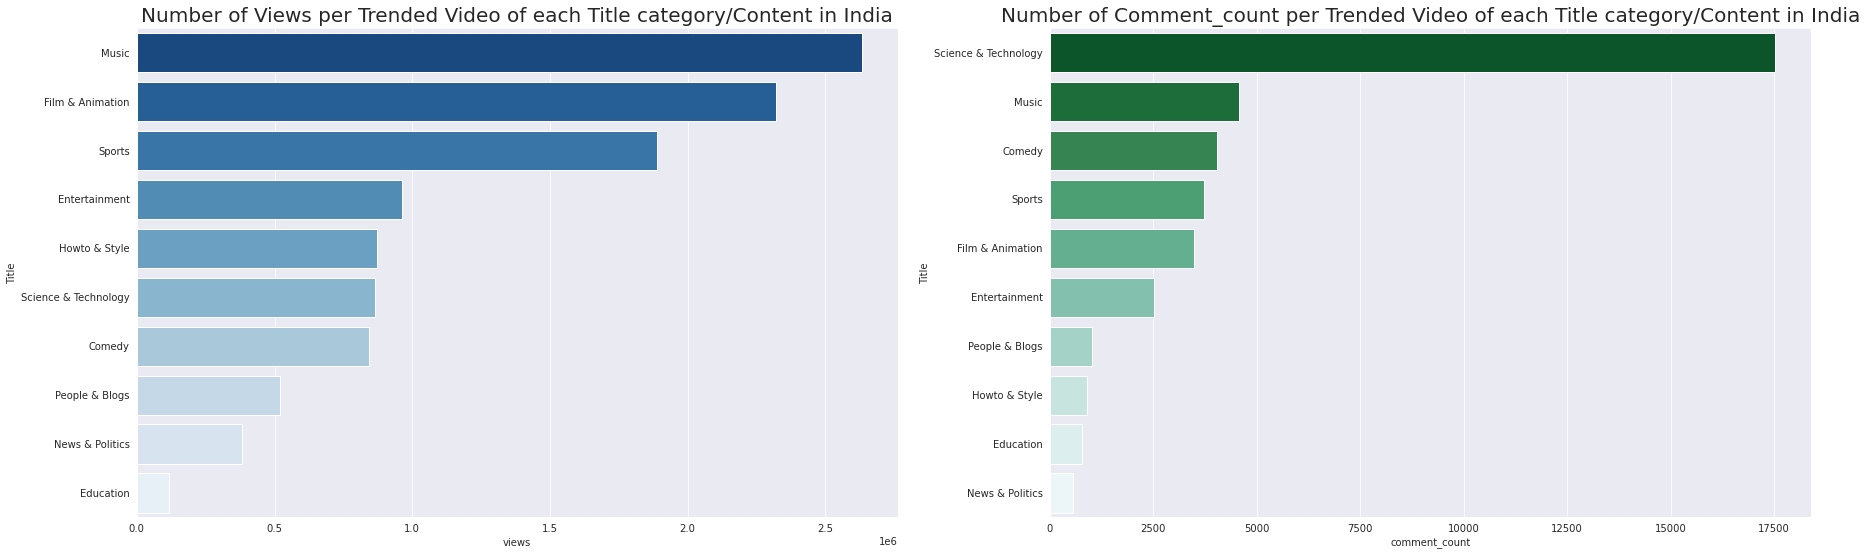

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [ ]:
analyse_by_mulfactor(df,['views','comment_count'],name='India')

## Views Distribution
**India consumes a tremendous amount of music on YouTube .**
* On average, Popular Music videos on YouTube gain around **2.5 million views**.
* Users hailing from the Northern part of India generally upvote Punjabi songs.
* Around 49% of active-users access Youtube for the latest soundtracks. 

**Film & Animation**
* According to the bar chart above shown **More than 2 million** people in India enjoy watching movies on YouTube.
* Youtube is also known for it's extensive movies collection. 
* India has had a longstanding reputation of its acclaimed film industry and continues to be by far the world’s largest producer of films. Nevertheless, domestic demand for films appears to be waning as in a number of developed countries with mature film industries.

**SportsMan Spirit in India.**
* Trended Sports related Video generally gains **more than 1.7 million views**. 
* India is well known for its love for sports and has many sporting teams competing at world class level. Indian sportsmen are passionate and dedicated , and they are supported by legions of loyal fans.


## Response on Comment Section

**Science & Technology**
* Trended Science fiction Videos or Technical videos have around **17.5k** Comment response. This is due to the fact that most of the Indian youth have more interest and curiosity in this feild.

**Music**
* The average Trending Music Video gets **3.2** comments
* Fan-following of the artists is one of the major reasons for the same.

['likes', 'dislikes']


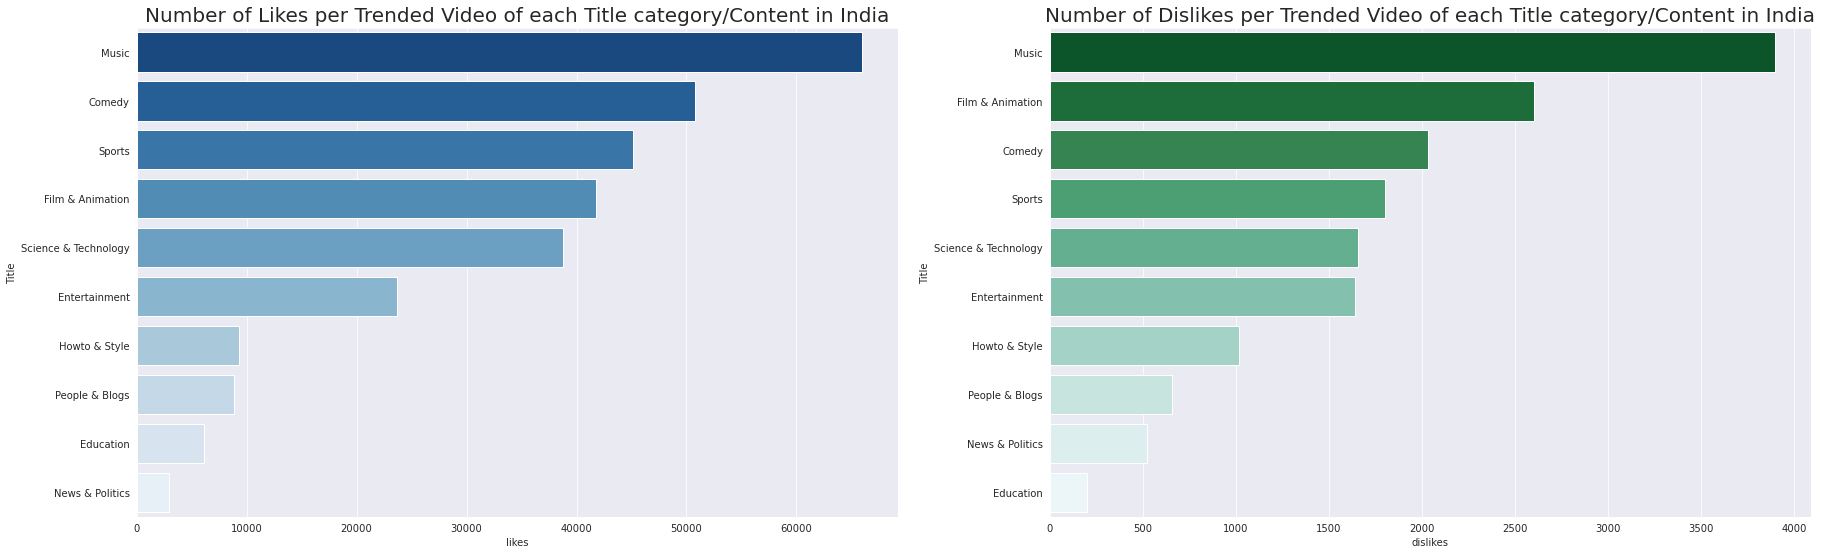

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [ ]:
analyse_by_mulfactor(df,['likes','dislikes'],name='India')

# Visualize video status/errors

,Title,comments_disabled,Counts
0,Autos & Vehicles,False,63
1,Autos & Vehicles,True,9
2,Comedy,False,3429
3,Education,False,1093
4,Education,True,134
5,Entertainment,False,16259
6,Entertainment,True,453
7,Film & Animation,False,1587
8,Film & Animation,True,71
9,Gaming,False,66


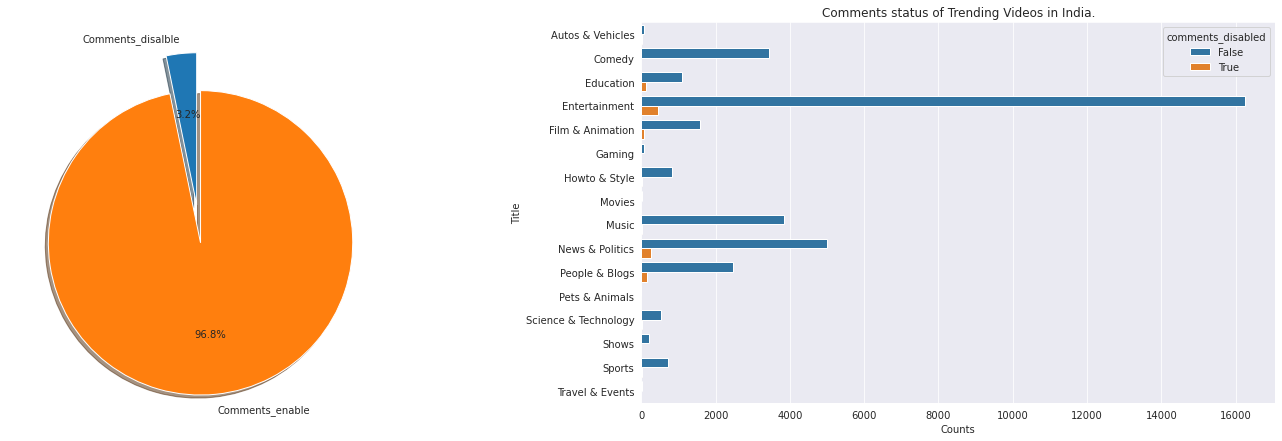

In [ ]:
#Comments Disabled on Videos

def comment_analysis(df,name):
    labels=['Comments_disalble','Comments_enable']
    Values=[df.comments_disabled.value_counts()[1],df.comments_disabled.value_counts()[0]]
    explode=(0.05,0.2)
    f,ax=plt.subplots(1,2, figsize=(25,7))
    ax[0].pie(Values,explode=explode, labels=labels, autopct='%1.1f%%',
           shadow=True, startangle=90)
    
    df=pd.DataFrame(df.groupby(['Title']).comments_disabled.value_counts())
    df.columns=['Counts']
    df.reset_index(level=[1,0],inplace=True)
    plt.title('Comments status of Trending Videos in {}.'.format(name.capitalize()))
    sns.barplot(x='Counts',y='Title',data=df,hue='comments_disabled',ax= ax[1])
    return df
    
    
comment_analysis(df,'INDIA')

# Time series analysis

In [ ]:
df['Month']=df.publish_date.apply(lambda x: x[3:5]+str(-20)+x[:2])
df.Month.value_counts()

12-2017    5754
05-2018    5664
03-2018    5436
01-2018    5389
02-2018    4766
04-2018    4474
11-2017    3703
06-2018    2164
05-2017       2
Name: Month, dtype: int64

In [ ]:
# We don't have much data of May 2017 ,So we can exclude it.
df=df[df.Month!='05-2017']

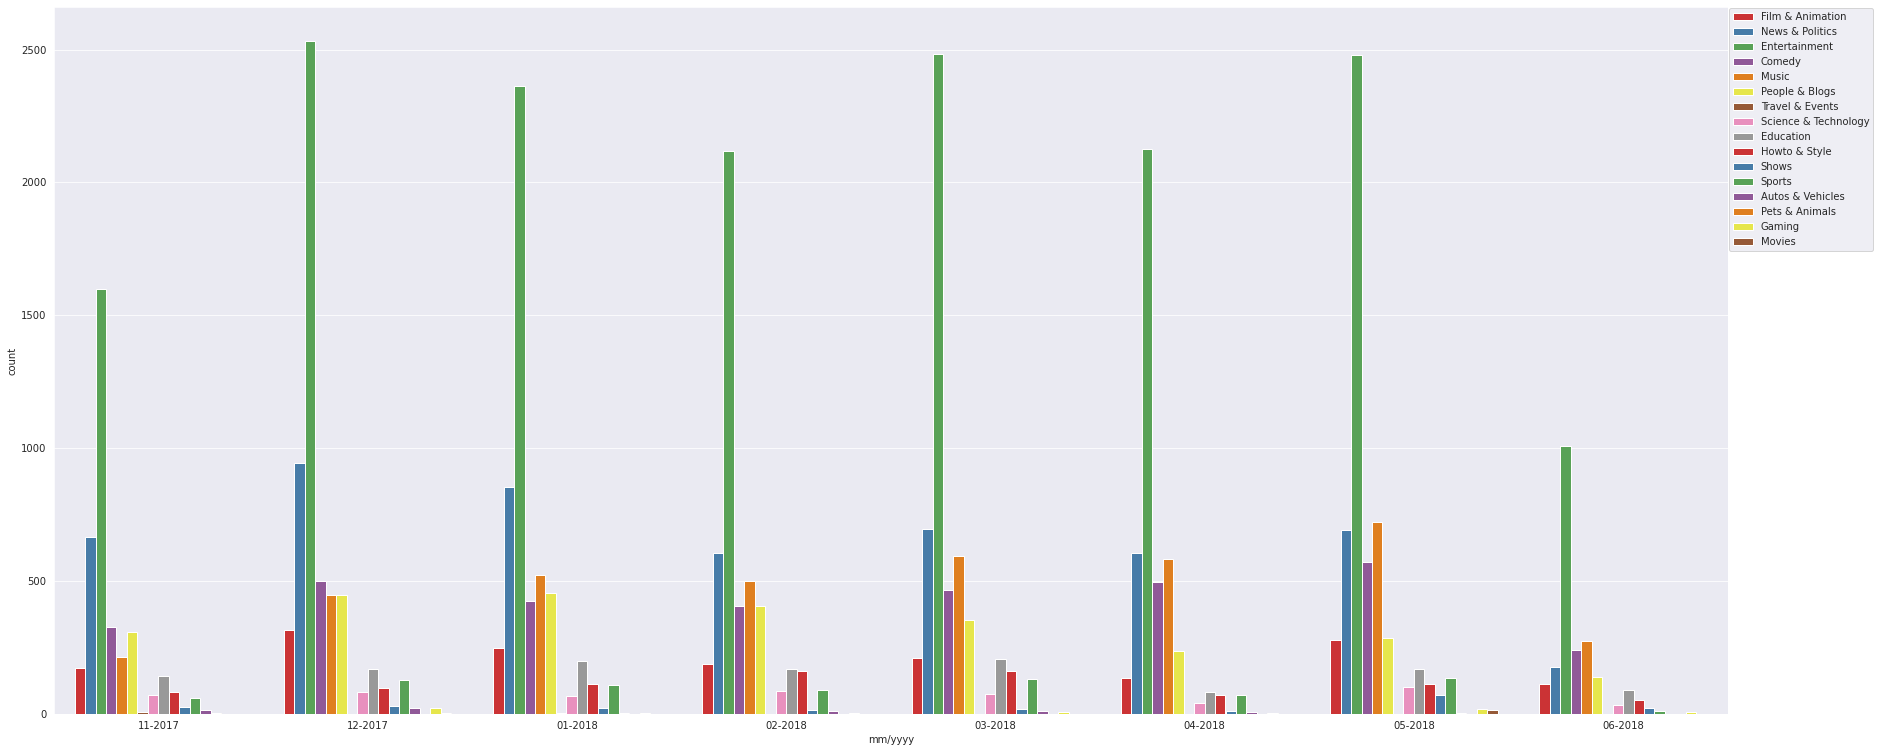

In [ ]:
#no of content type posted each month
plt.figure(figsize=(30,13))
sns.countplot(x='Month', data=df, hue='Title',palette='Set1')
# Put the legend out of the figure
plt.xlabel('mm/yyyy')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.1)

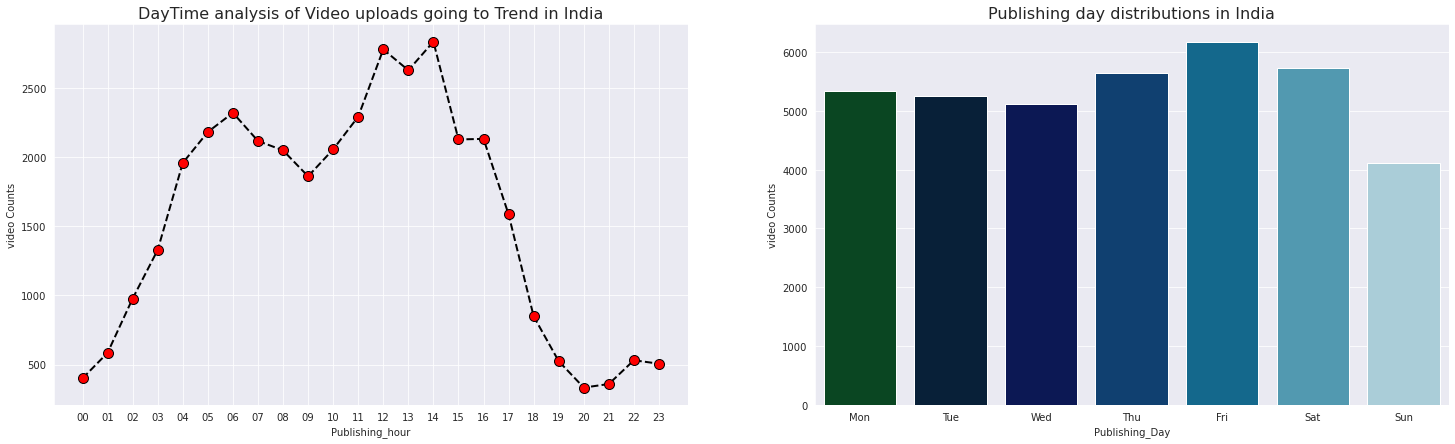

In [ ]:
def Plot_Published_Daytime(df,name):
    Series=df.publishing_day.value_counts()
    
    df=df.publish_time.apply(lambda x: x[:2]).value_counts().sort_index().to_frame()
    df.columns=['Video_Count']; df.reset_index(level=0)
    
    f,ax=plt.subplots(1,2, figsize=(25,7))
    
    ax[0].set_title("DayTime analysis of Video uploads going to Trend in {}".format(name.capitalize()),fontsize=16)
    # Set common labels
    ax[0].set_xlabel('Publishing_hour')
    ax[0].set_ylabel('video Counts')
    ax[0].plot(df.index,df.Video_Count,marker='o',ls='--', color='black',
               markerfacecolor="r",linewidth=2, markersize=10)
    
    ax[1].set_xlabel('Publishing_Day')
    ax[1].set_ylabel('video Counts')
    ax[1].set_title("Publishing day distributions in {}".format(name.capitalize()),fontsize=16)
    sns.barplot(x=Series.index, y=Series.values, ax=ax[1],palette='ocean', order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
    

Plot_Published_Daytime(df,'India')

### From above Time-Series Graph we can conclude:
* The days that show the highest level of engagement are from **Thursday through Saturday**, as well as Monday.
* Videos with around all types of content were actively posted in **month of Dec. 2017** and **May 2018**.
* Sunday seems to be less active day for video uploads. In general people spend a lot of time trying to master the process of creating an epic YouTube video in free time(i.e **Sunday**)
* The best time to post, in general, is from **12pm to 2pm**, though we can still get success at early 6am.


![](https://i.pinimg.com/originals/78/9c/33/789c3306e7c3813963ad3ca5c237b45a.gif)
<br>

## -------------------------------------------------------------------------
<br>

# Correlation between factors that make a Trending Video

Correlation analysis is a method of statistical evaluation used to study the strength of a relationship between two, numerically measured, continuous variables (e.g. height and weight). This particular type of analysis is useful when a researcher wants to establish if there are possible connections between variables. It is often misunderstood that correlation analysis determines cause and effect; however, this is not the case because other variables that are not present in the research may have impacted on the results.
 
<img src="http://www.djsresearch.co.uk/images/Correlation%20Analysis%20Market%20Research.PNG" width="800" height="350">

In [ ]:
# Selecting Random 5 rows from DataFrame
df.sample(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Title,publish_date,publishing_day,Month
13852,ynDbuweokwk,18-01-28,पाहून मोदी झाले थक्क!दिल्लीत शिवरायांचा चित्रर...,VIRAL IN INDIA,22,10:27,"Republic Day 2018|""Maharashtra""|""Sambhajiraje""...",682017,13382,460,768,https://i.ytimg.com/vi/ynDbuweokwk/default.jpg,False,False,False,Don't Forget to SUBSCIRBE to our YouTube Chann...,People & Blogs,18-01-26,Fri,01-2018
34944,bKy_RIuKDGg,18-06-01,Kodaden Beda Thogolod Goththu | Kotigobba - 2 ...,Anand Audio Kannada Comedy,23,09:41,"kotigobba 2|""kotigobba 2 best scene""|""kotigobb...",78858,419,28,8,https://i.ytimg.com/vi/bKy_RIuKDGg/default.jpg,False,False,False,Watch HD Comedy Scene 03 Kotigobba-2 Starring:...,Comedy,18-05-31,Thu,05-2018
6086,x2KNCpVi-5A,17-12-15,"'മമ്മൂട്ടി അത്ര നല്ലവനല്ല,ഒരു രാത്രി മമ്മൂട്ടി...",Manchu Mon,22,08:55,"Ramaleela riview|""dileeb new film""|""ramaleela ...",124225,0,0,0,https://i.ytimg.com/vi/x2KNCpVi-5A/default.jpg,True,True,False,"'മമ്മൂട്ടി അത്ര നല്ലവനല്ല,ഒരു രാത്രി മമ്മൂട്ടി...",People & Blogs,17-12-12,Tue,12-2017
10423,Lg8RMAHE2x0,18-01-08,Bigg Boss Evicted Contestant Luv Tyagi Wants S...,Saas Bahu Aur Betiyaan,24,16:06,"saas bahu beti|""saas bahu aur beti""|""saas bahu...",695831,7838,692,2798,https://i.ytimg.com/vi/Lg8RMAHE2x0/default.jpg,False,False,False,Luv Tyagi wants Shilpa Shinde to win Big Boss....,Entertainment,18-01-07,Sun,01-2018
33108,JIPgxSM4PQA,18-05-22,மோடியின் ஊழலற்ற அரசாங்கம்?| Vikileaks | Black ...,Black Sheep,24,12:30,"vikileaks|""blacksheep""|""smile settai""|""dude vi...",84920,4498,321,517,https://i.ytimg.com/vi/JIPgxSM4PQA/default.jpg,False,False,False,Vikileaks is Dude Vicky's vlog revealing the h...,Entertainment,18-05-21,Mon,05-2018


> A heatmap is a graphical representation of data that uses a system of color-coding to represent different values.
<br>
> We well use heatmap to visualize correlation strength.

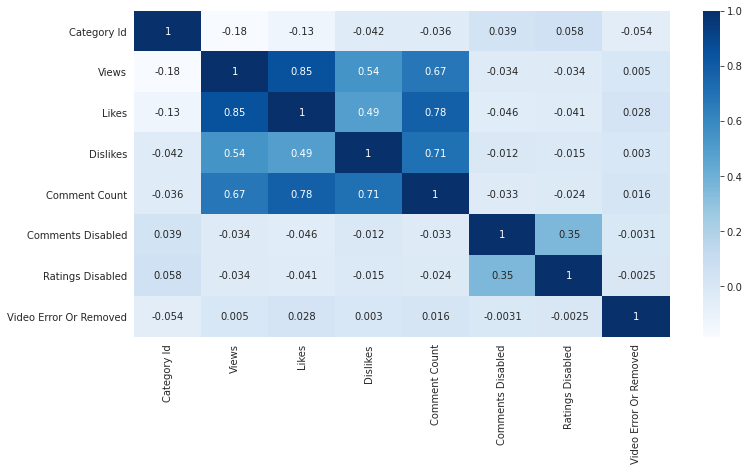

In [ ]:
plt.figure(figsize=(12,6))
label=[x.replace('_', ' ',3).title() for x in df.select_dtypes(include=['int','bool']).columns.values]
sns.heatmap(df.corr(), annot=True,
           xticklabels=label, yticklabels=label, cmap='Blues')

 **Factors i.e 'Views', 'Likes' , 'Comment Counts' are positively correlated !**
<br>
**Let's take a closer look at them.**

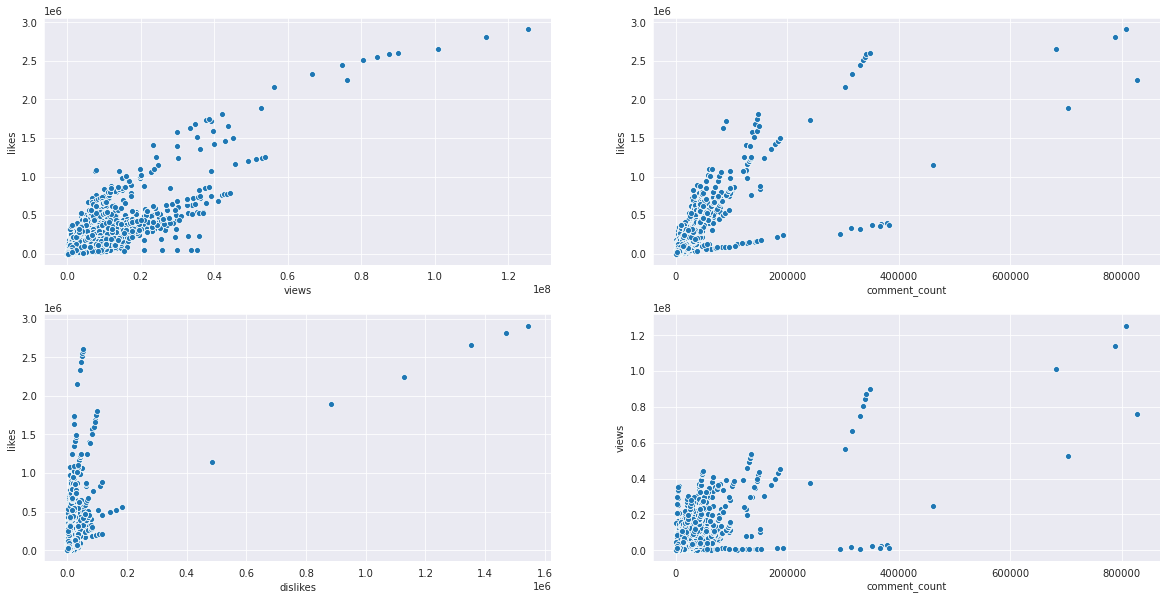

In [ ]:
def Plot_corr(df):
    f,ax=plt.subplots(2,2,figsize=(20,10))
    
    sns.scatterplot(x='views',y='likes', data=df, ax=ax[0][0])
    sns.scatterplot(x='comment_count',y='likes', data=df, ax=ax[0][1])
    sns.scatterplot(x='dislikes',y='likes', data=df, ax=ax[1][0])
    sns.scatterplot(x='comment_count',y='views', data=df, ax=ax[1][1])

Plot_corr(df)

## Another verification of the correlation matrix is to plot **sactter plot** between variables.

##### 1. High Positive correlation is shown by:
* Views and likes
* likes and comment count

##### 2. Moderate Positive correlation is shown by:
* views and comment count

##### 3. Low correlation is shown by:
* likes and dislikes
<br><br>

### Also, We can find the correlation between *length of Trending Video Title,description* with *Views* it gains.
#### Let's code it below !

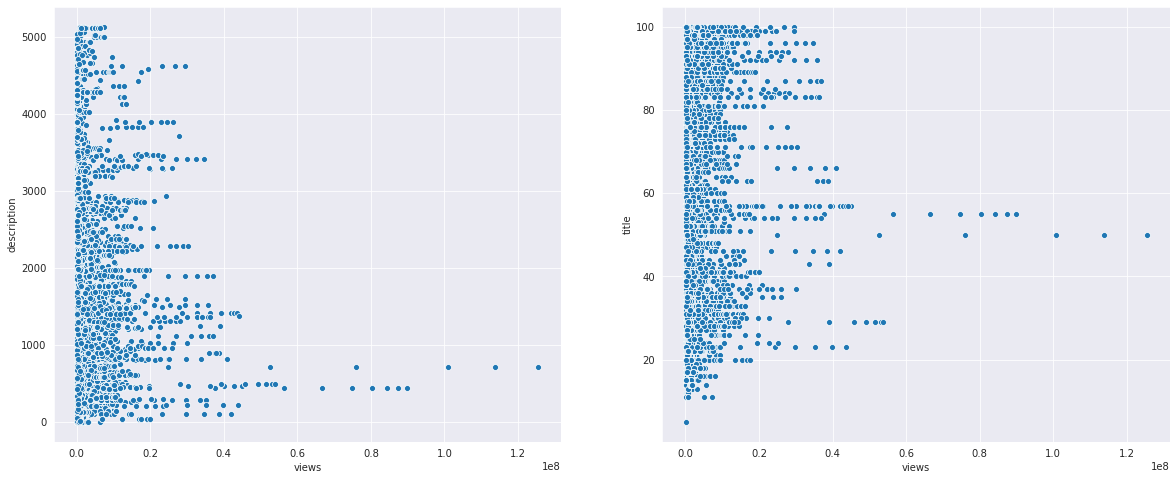

In [ ]:
def Title_dis_visulize(df):
    f,axes=plt.subplots(1,2, figsize=(20,8))
    sns.scatterplot(y=df.description.apply(lambda x: len(str(x))),x=df.views, ax=axes[0])
    sns.scatterplot(y=df.title.apply(len),x=df.views, ax=axes[1])
    
    
Title_dis_visulize(df)

Their is No correlation between them in above 2 Scatter plot !

# Text analysis via wordcloud
**Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.**

**A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.**

In [ ]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Title,publish_date,publishing_day,Month
0,kzwfHumJyYc,17-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,Film & Animation,17-11-12,Sun,11-2017
1,zUZ1z7FwLc8,17-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",News & Politics,17-11-13,Mon,11-2017
2,10L1hZ9qa58,17-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,Entertainment,17-11-12,Sun,11-2017
3,N1vE8iiEg64,17-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,Comedy,17-11-12,Sun,11-2017
4,kJzGH0PVQHQ,17-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,Entertainment,17-11-13,Mon,11-2017


In [ ]:
def Show_Wordcolud(df,content_category):
    print('This may take some Time :-)')
    if len(content_category) !=4:
        raise ValueError('Incomplete List to Plot. Expected len:4,got:{}'.format(len(content_category)))
    else:
        
        f,ax=plt.subplots(2,2, figsize=(26,20))
        i=0
        for content in tqdm(content_category):
            mylist=df[df.Title==str(content)].title.apply(lambda x: x.split())
            mylist = [x for y in mylist for x in y]
            mylist=[x for x in mylist if x not in string.punctuation]
            unique_string=(" ").join(mylist)
            wordcloud = WordCloud(width=1400, height=1200, background_color='white', max_words=180).generate(unique_string)
            ax[i//2][i%2].grid(False)
            ax[i//2][i%2].set_title("WordCloud if Titles in '{}' video content".format(content),fontsize=20)
            ax[i//2][i%2].imshow(wordcloud, aspect='auto')
            i+=1
        plt.show()
 

  0%|          | 0/4 [00:00<?, ?it/s]

This may take some Time :-)


100%|██████████| 4/4 [00:16<00:00,  4.21s/it]


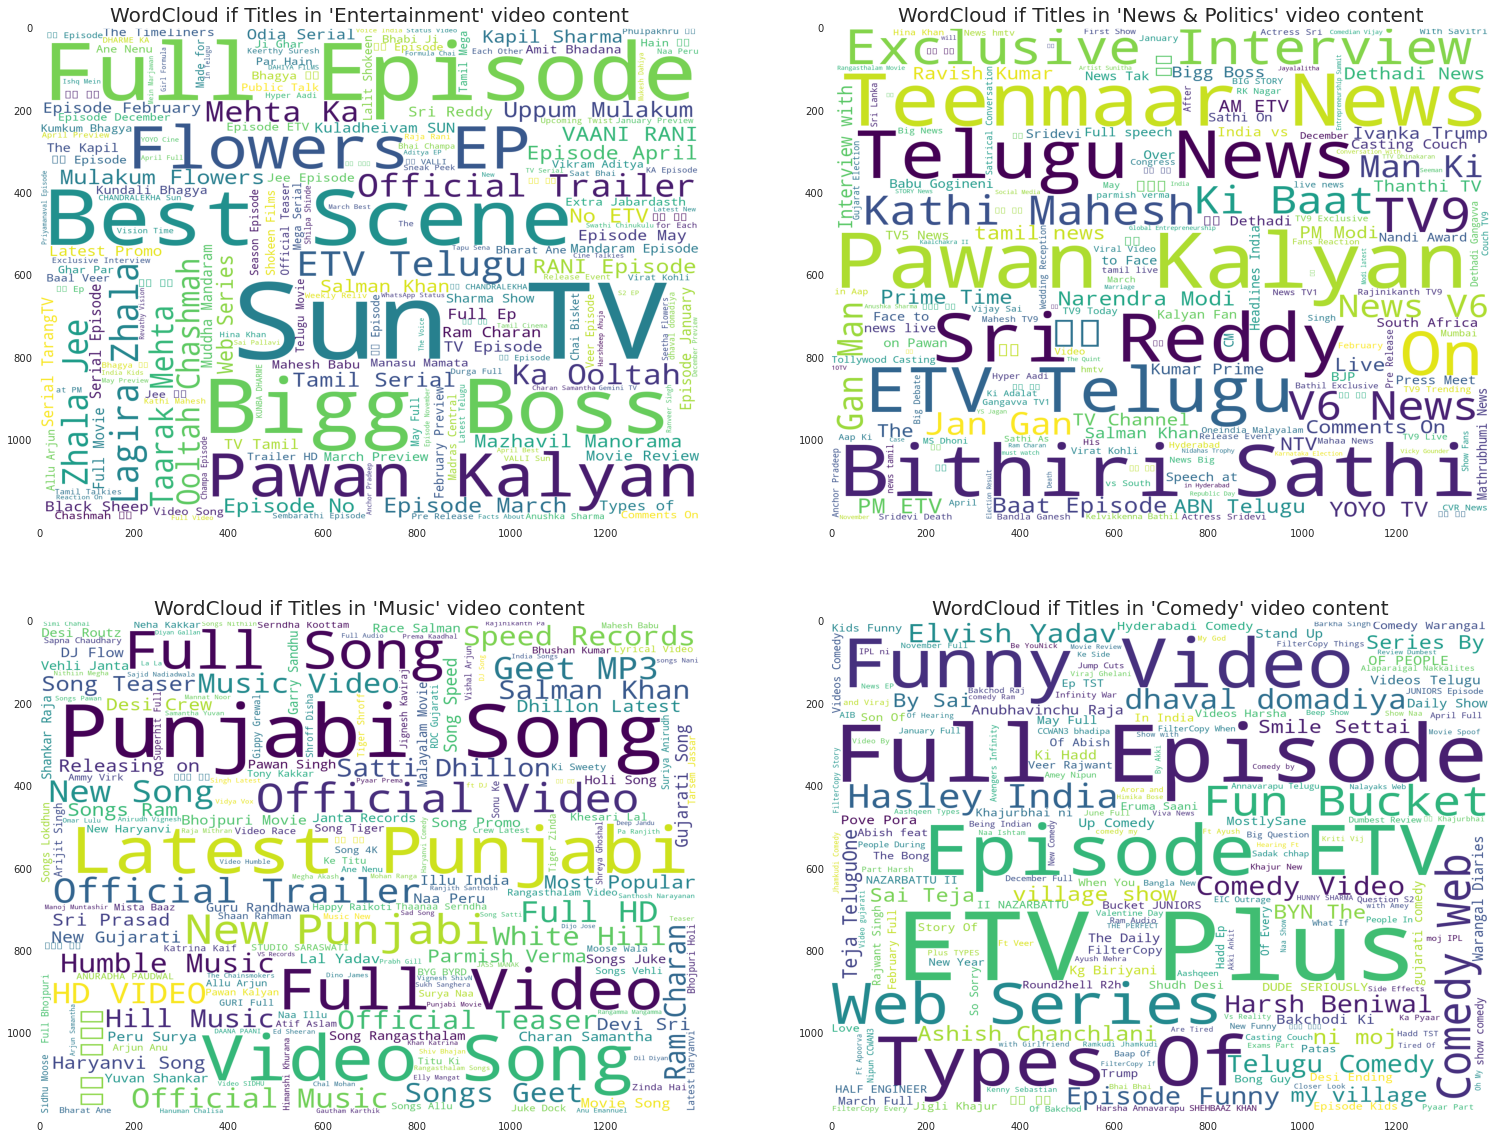

In [ ]:
Show_Wordcolud(df,df.Title.value_counts().index[:4].to_list())

# Finding most Appreciated/Trended video channels among different category/Titles
As One says:
* Creating consistent content on YouTube isn’t going to guarantee views, shares, likes, or even success.
* Always deliver more than expected.
* Success comes down to creating the right content. A big part of this is understanding the type of content that historically does really well on the platform and the types of video that users prefer to consume, especially your tailored-audience.

### Top 20 Trended YouTube channels barplot over the data collection time !

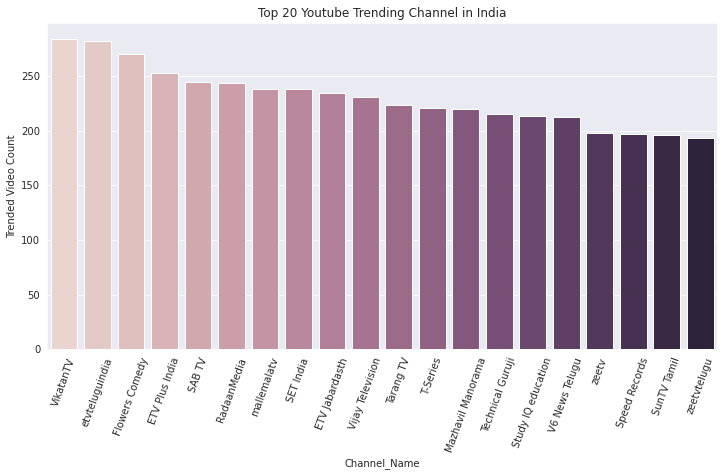

In [ ]:
def Plot_top20_channel(df,name):
    df=pd.DataFrame(df.channel_title.value_counts()[:20])
    df=df.reset_index(level=0)
    df.columns=['Channel_Name', 'Trended Video Count']
    plt.figure(figsize=(12,6))
    plt.title('Top 20 Youtube Trending Channel in {}'.format(name))
    sns.barplot(x='Channel_Name', y='Trended Video Count', data=df, palette=sns.cubehelix_palette(20))
    plt.xticks(rotation=70)
Plot_top20_channel(df,'India')    

### Top 5 Trended Youtube channels in *'Gaming', 'Science & Technology', 'Music', 'Entertainment'* sectors

In [ ]:
def Top_Channels(df):
    Content_list=['Gaming', 'Science & Technology', 'Music', 'Entertainment']
    f,ax=plt.subplots(2, 2, figsize=(25,12))
    color=[sns.light_palette((210, 90, 60), input="husl",reverse=True), sns.cubehelix_palette(5,reverse=True),
          sns.light_palette("navy", reverse=True), sns.light_palette("green",reverse=True)]
    for i, content in enumerate(Content_list):
        print('....{}....'.format(content))
        print(df[df.Title==content].channel_title.value_counts()[:5])
        print('---------------------------')
        ax[i//2][i%2].set(xlabel="No. of Videos Trended", ylabel="Channel")
        ax[i//2][i%2].set_title(content.capitalize(),fontsize=22)
        sns.barplot(x=df[df.Title==content].channel_title.value_counts()[:5].values,
                    y=df[df.Title==content].channel_title.value_counts()[:5].index, ax=ax[i//2][i%2], palette=color[i] )
        

....Gaming....
Clash of Clans       29
Clash Royale         22
PewDiePie             7
Talking Tom           4
All India Bakchod     3
Name: channel_title, dtype: int64
---------------------------
....Science & Technology....
Technical Guruji      215
Geekyranjit            69
Sharmaji Technical     68
Marques Brownlee       60
Unbox Therapy          16
Name: channel_title, dtype: int64
---------------------------
....Music....
T-Series                221
Speed Records           197
Aditya Music            180
T-Series Apna Punjab    179
Zee Music Company       146
Name: channel_title, dtype: int64
---------------------------
....Entertainment....
etvteluguindia    282
Flowers Comedy    270
RadaanMedia       243
SAB TV            241
SET India         238
Name: channel_title, dtype: int64
---------------------------


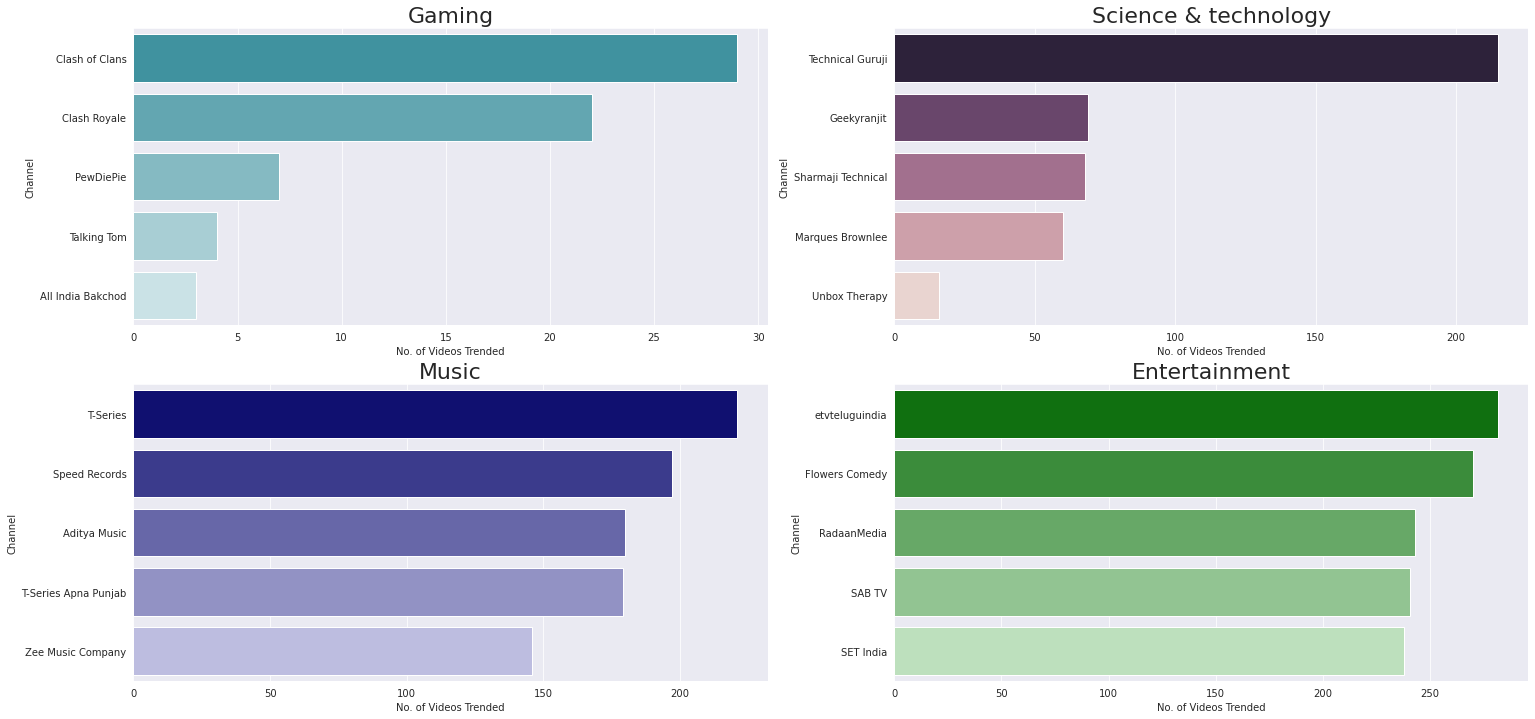

In [ ]:
Top_Channels(df)

#### Gaming:
* In 2017-2018 **Multiplayer combat strategy game** like '*Clash of Clans*' (29 trended videos), '*Clash Royale*' (22 trended videos) gained popularity .
* Don't know why '*All India Bakchod*' channel is in Gaming category !!?

#### Science & Technology:
* Channels like **Technical Guruji** (215 trended videos), **Geekyranjit** (69 trended videos), **Sharmaji Technical** (68 trended videos) that provide latest tech-reviews, have rose to become some of the world's most subscribed Hindi-Tech YouTube channel.
*  **Unbox Therapy** (16 trended videos) is a Canadian unboxing and tech-review YouTube channel produced by Lewis George Hilsenteger and Jack McCann. This channel serves exceptionally great Videos.

#### Music:
* Channels like **T-Series** (221 trended videos), **Aditya Music** (180 trended videos), **T-Series Apna Punjab (179 trended videos)**, **Zee Music Company (146 trended videos)** provide the latest music-videos, which helps them in gaining more engagement on Youtube.

#### Entertainment:
* In this sector, Channels gain or lose Popularity depending on the quality of videos uploaded and consistency. Look's like **etvteluguindia**, **Flowers Comedy**, **RadaanMedia**, **SAB TV** channels have done well here. 

<br>
<br>
<br>

## To-Do List completed................!!
![](https://i.gifer.com/7ImI.gif)
<br>
# Thanks for reading :-)